# Imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
import os
import sys
proj_root= '\\'.join(os.getcwd().split('\\')[:-1])

In [59]:
from sklearn.model_selection import train_test_split

In [11]:
proj_root

'C:\\Users\\dib_n\\OneDrive\\Documentos\\github\\mudib_house_prices'

In [151]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Utils

In [53]:
def add_labels(ax,type_='vertical',format_='{}'):
    rects = ax.patches
    tam_ = np.abs(ax.get_xlim()[0]-ax.get_xlim()[1])
    
    if type_=='vertical':
        for rect in rects:
            height = rect.get_height()
            label = format_.format(height)
            ax.text(
                rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
            )
    else:
        for rect in rects:
            width = rect.get_width()
            label = format_.format(width)
            ax.text(
                rect.get_width()+0.01*tam_, rect.get_y(), label, ha="left", va="bottom"
            )

# Load data

In [129]:
# Train data
df = pd.read_csv(proj_root+'/dados/train.csv')
X,y = (df.drop('SalePrice',axis=1),df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=6,test_size=.3)

In [130]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal
1166,1167,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
935,936,30,RL,52.0,5825,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
588,589,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,...,60,0,NaN,NaN,NaN,0,6,2009,WD,Partial
80,81,60,RL,100.0,13000,Pave,NaN,Reg,Lvl,AllPub,...,252,0,NaN,NaN,NaN,0,6,2009,WD,Normal


# Explanatory

## Checking if there are nulls

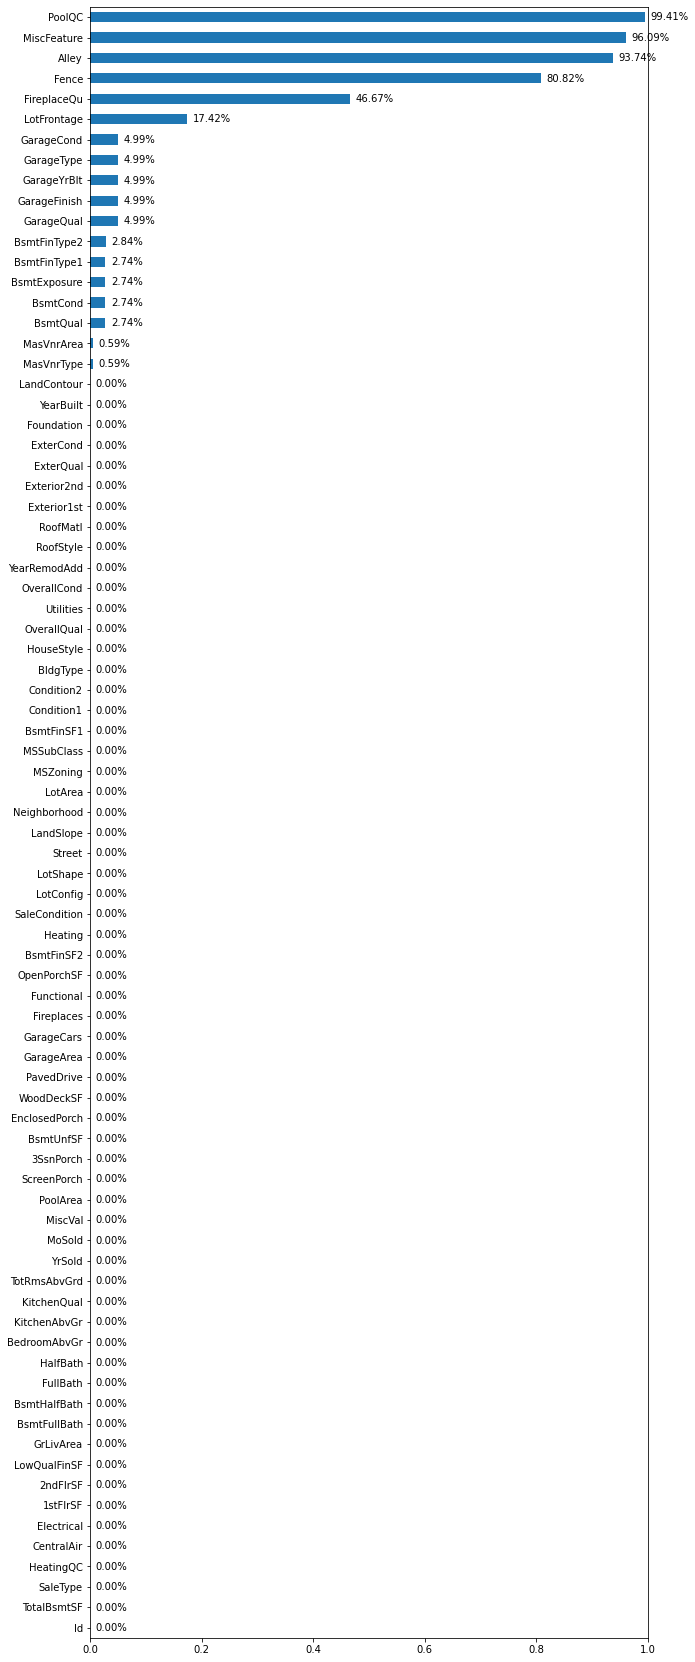

In [131]:
fig,axs=plt.subplots(figsize=(10,30))

X_train.isnull().mean().sort_values().plot(kind='barh',ax=axs)
axs.set_xlim(0,1)
add_labels(axs,type_='horizontal',format_="{:.2%}")
plt.show()

## Treating NULLs

In [132]:
class Predictor:
    def __init__(self):
        pass
    def fit(X,y):
        pass
    def transform(X:pd.DataFrame) -> pd.DataFrame:
        pass
    def predict(X):
        X_ = self.transform(X)
        pass

In [133]:
X_train['PoolQC'] = X_train['PoolQC'].replace(np.nan,'no_pool')
X_train['MiscFeature'] = X_train['MiscFeature'].replace(np.nan,'no_misc')
X_train['Alley'] = X_train['Alley'].replace(np.nan,'no_alley')
X_train['Fence'] = X_train['Fence'].replace(np.nan,'no_fence')
X_train['FireplaceQu'] = X_train['FireplaceQu'].replace(np.nan,'no_fireplace')
X_train['LotFrontage'] = X_train['LotFrontage'].replace(np.nan,0)
X_train['GarageType'] = X_train['GarageType'].replace(np.nan,'no_garage')
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.nan,0)
X_train['GarageFinish'] = X_train['GarageFinish'].replace(np.nan,'no_garage')
X_train['GarageQual'] = X_train['GarageQual'].replace(np.nan,'no_garage')
X_train['GarageCond'] = X_train['GarageCond'].replace(np.nan,'no_garage')
X_train['BsmtQual'] = X_train['BsmtQual'].replace(np.nan,'no_bsmt')
X_train['BsmtCond'] = X_train['BsmtCond'].replace(np.nan,'no_bsmt')
X_train['BsmtExposure'] = X_train['BsmtExposure'].replace(np.nan,'no_bsmt')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].replace(np.nan,'no_bsmt')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].replace(np.nan,'no_bsmt')
X_train['MasVnrType'] = X_train['MasVnrType'].replace(np.nan,'None')
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.nan,0)
X_train['Electrical'] = X_train['Electrical'].replace(np.nan,'no_ele')

In [134]:
X_test['PoolQC'] = X_test['PoolQC'].replace(np.nan,'no_pool')
X_test['MiscFeature'] = X_test['MiscFeature'].replace(np.nan,'no_misc')
X_test['Alley'] = X_test['Alley'].replace(np.nan,'no_alley')
X_test['Fence'] = X_test['Fence'].replace(np.nan,'no_fence')
X_test['FireplaceQu'] = X_test['FireplaceQu'].replace(np.nan,'no_fireplace')
X_test['LotFrontage'] = X_test['LotFrontage'].replace(np.nan,0)
X_test['GarageType'] = X_test['GarageType'].replace(np.nan,'no_garage')
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].replace(np.nan,0)
X_test['GarageFinish'] = X_test['GarageFinish'].replace(np.nan,'no_garage')
X_test['GarageQual'] = X_test['GarageQual'].replace(np.nan,'no_garage')
X_test['GarageCond'] = X_test['GarageCond'].replace(np.nan,'no_garage')
X_test['BsmtQual'] = X_test['BsmtQual'].replace(np.nan,'no_bsmt')
X_test['BsmtCond'] = X_test['BsmtCond'].replace(np.nan,'no_bsmt')
X_test['BsmtExposure'] = X_test['BsmtExposure'].replace(np.nan,'no_bsmt')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].replace(np.nan,'no_bsmt')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].replace(np.nan,'no_bsmt')
X_test['MasVnrType'] = X_test['MasVnrType'].replace(np.nan,'None')
X_test['MasVnrArea'] = X_test['MasVnrArea'].replace(np.nan,0)
X_test['Electrical'] = X_test['Electrical'].replace(np.nan,'no_ele')

## Checking Data Types and Distributions

In [192]:
colunas_tratadas = {}

In [85]:
for c in sorted(X_train.columns):
    print(c)

1stFlrSF
2ndFlrSF
3SsnPorch
Alley
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
Id
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


### Square Feets Units

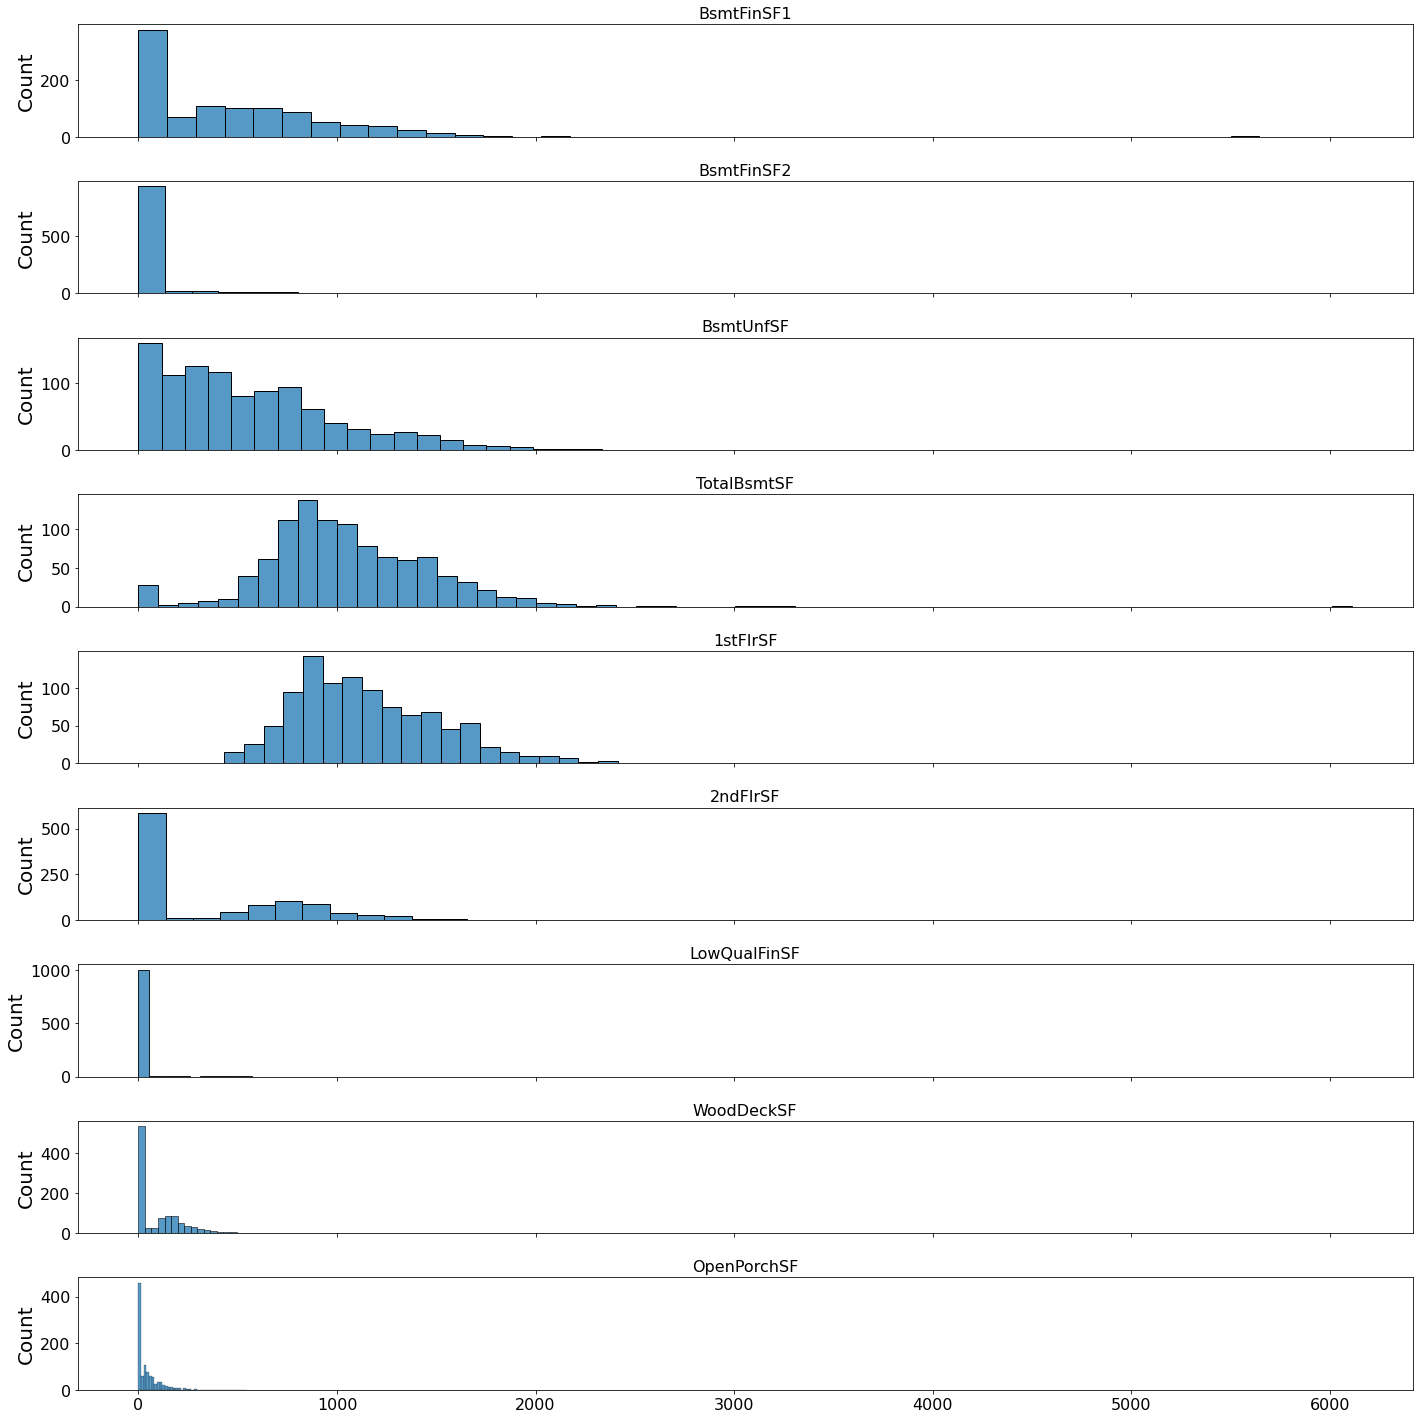

In [179]:
sf_cols = X_train.filter(regex='SF($|[0-9])').columns

fig,axs = plt.subplots(figsize=(20,20),nrows=len(sf_cols),sharex=True)

for col,ax in zip(sf_cols,axs):
    ax.set_title(col)
    sns.histplot(X_train[col],ax=ax)
    ax.set_xlabel('')
fig.tight_layout()
plt.show()

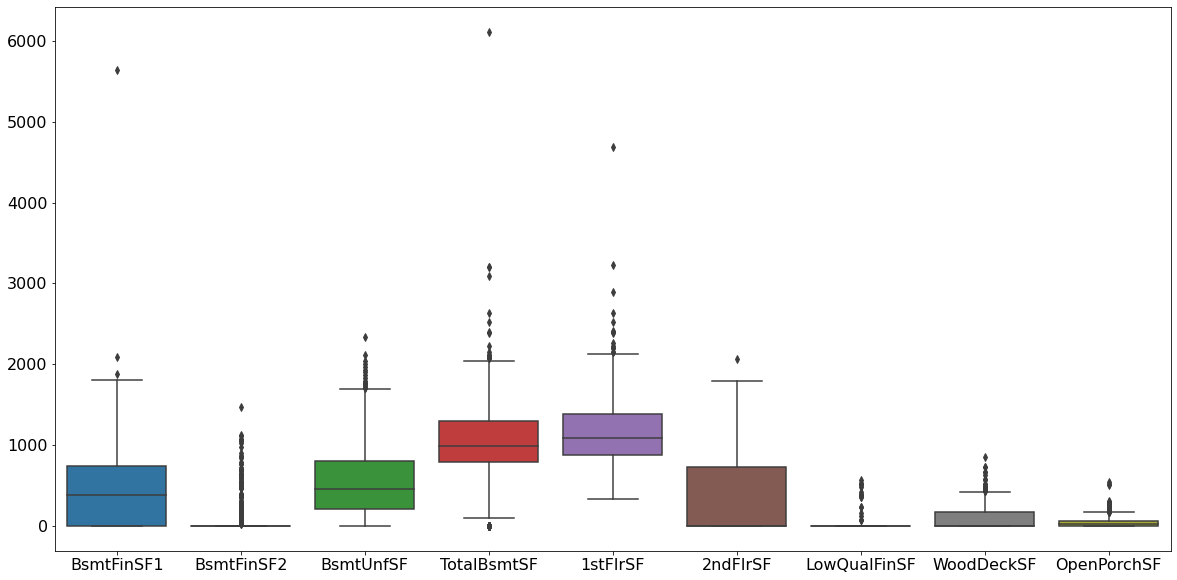

In [180]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[sf_cols],ax=axs)

plt.show()

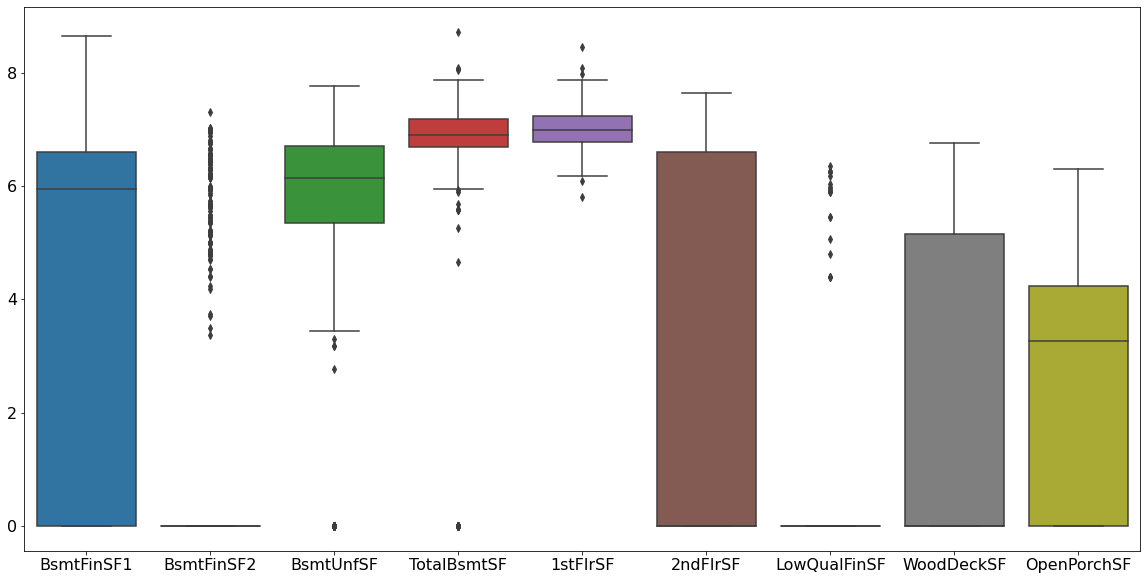

In [181]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[sf_cols].applymap(np.log1p),ax=axs)

plt.show()

In [193]:
sf_cols

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [197]:
colunas_tratadas['BsmtFinSF1']='log'
colunas_tratadas['BsmtFinSF2']='log'
colunas_tratadas['BsmtUnfSF']='log'
colunas_tratadas['TotalBsmtSF']='log'
colunas_tratadas['1stFlrSF']='log'
colunas_tratadas['2ndFlrSF']='log'
colunas_tratadas['LowQualFinSF']='log'
colunas_tratadas['WoodDeckSF']='log'
colunas_tratadas['OpenPorchSF']='log'

- For SF features, Log + Scailing should be effective

## Type features

In [138]:
X_train.filter(regex='Type$')

,BldgType,MasVnrType,GarageType,SaleType
435,1Fam,None,Attchd,ConLw
1166,1Fam,Stone,Attchd,WD
935,1Fam,BrkFace,Detchd,WD
588,1Fam,None,Attchd,WD
80,1Fam,BrkFace,Attchd,WD
...,...,...,...,...
1389,1Fam,None,Detchd,WD
618,1Fam,BrkFace,Attchd,New
227,Twnhs,BrkFace,Detchd,WD
713,2fmCon,BrkFace,Detchd,WD


In [204]:
type_cols=X_train.filter(regex='Type($|[0-9])').columns

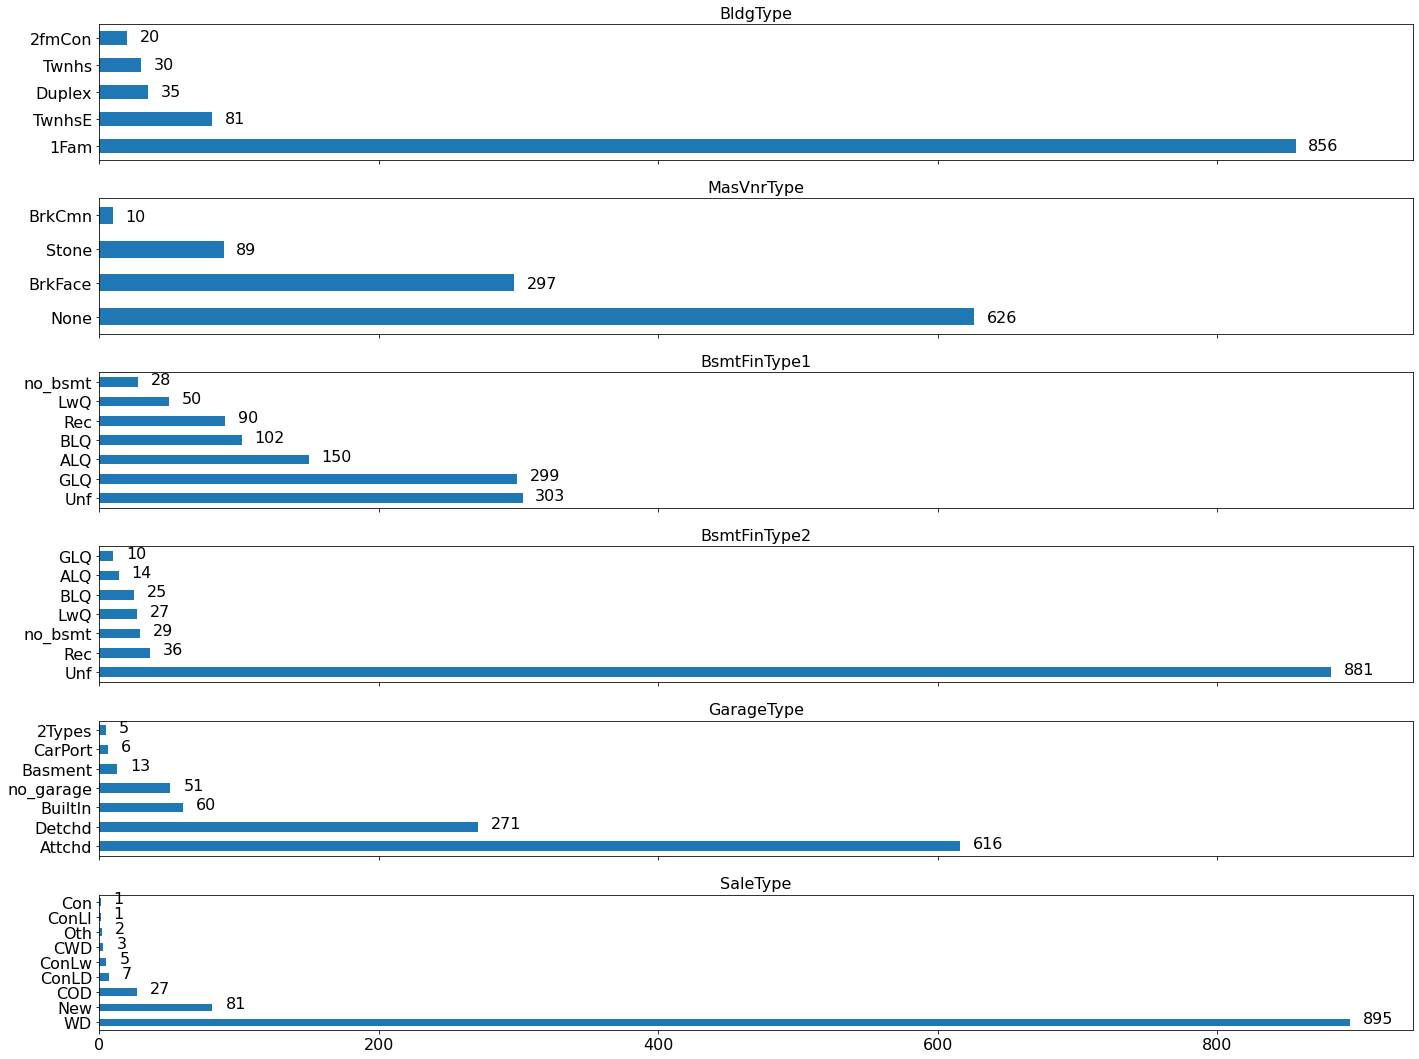

In [205]:
fig,axs = plt.subplots(figsize=(20,15),nrows=len(type_cols),sharex=True)

for col,ax in zip(type_cols,axs):
    ax.set_title(col)
    X_train[col].value_counts().plot(kind='barh',ax=ax)
    ax.set_xlabel('')
    add_labels(ax,type_='horizontal')

fig.tight_layout()
plt.show()

In [206]:
type_cols

Index(['BldgType', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'SaleType'],
      dtype='object')

In [207]:
colunas_tratadas['BldgType']='onehot'
colunas_tratadas['MasVnrType']='onehot'
colunas_tratadas['GarageType']='onehot'
colunas_tratadas['BsmtFinType1']='onehot'
colunas_tratadas['BsmtFinType2']='onehot'
colunas_tratadas['SaleType']='onehot_with_other'

For SaleType, due to the lack of examples in Con types, it'll be aggregated into other

For other objects, OneHotEncoder, should be effective

## Condition

In [187]:
X_train.filter(regex='(?i)cond')

,Condition1,Condition2,OverallCond,ExterCond,BsmtCond,GarageCond,SaleCondition
435,PosN,Norm,6,TA,TA,TA,Normal
1166,Norm,Norm,5,TA,TA,TA,Normal
935,Norm,Norm,5,Gd,TA,TA,Normal
588,Norm,Norm,8,TA,TA,TA,Partial
80,Norm,Norm,6,Gd,TA,TA,Normal
...,...,...,...,...,...,...,...
1389,Norm,Norm,6,Gd,Gd,TA,Normal
618,Norm,Norm,5,TA,TA,TA,Partial
227,Norm,Norm,6,TA,TA,TA,Normal
713,RRAn,Norm,5,TA,TA,TA,Normal


In [189]:
cond_cols = X_train.filter(regex='(?i)cond').columns

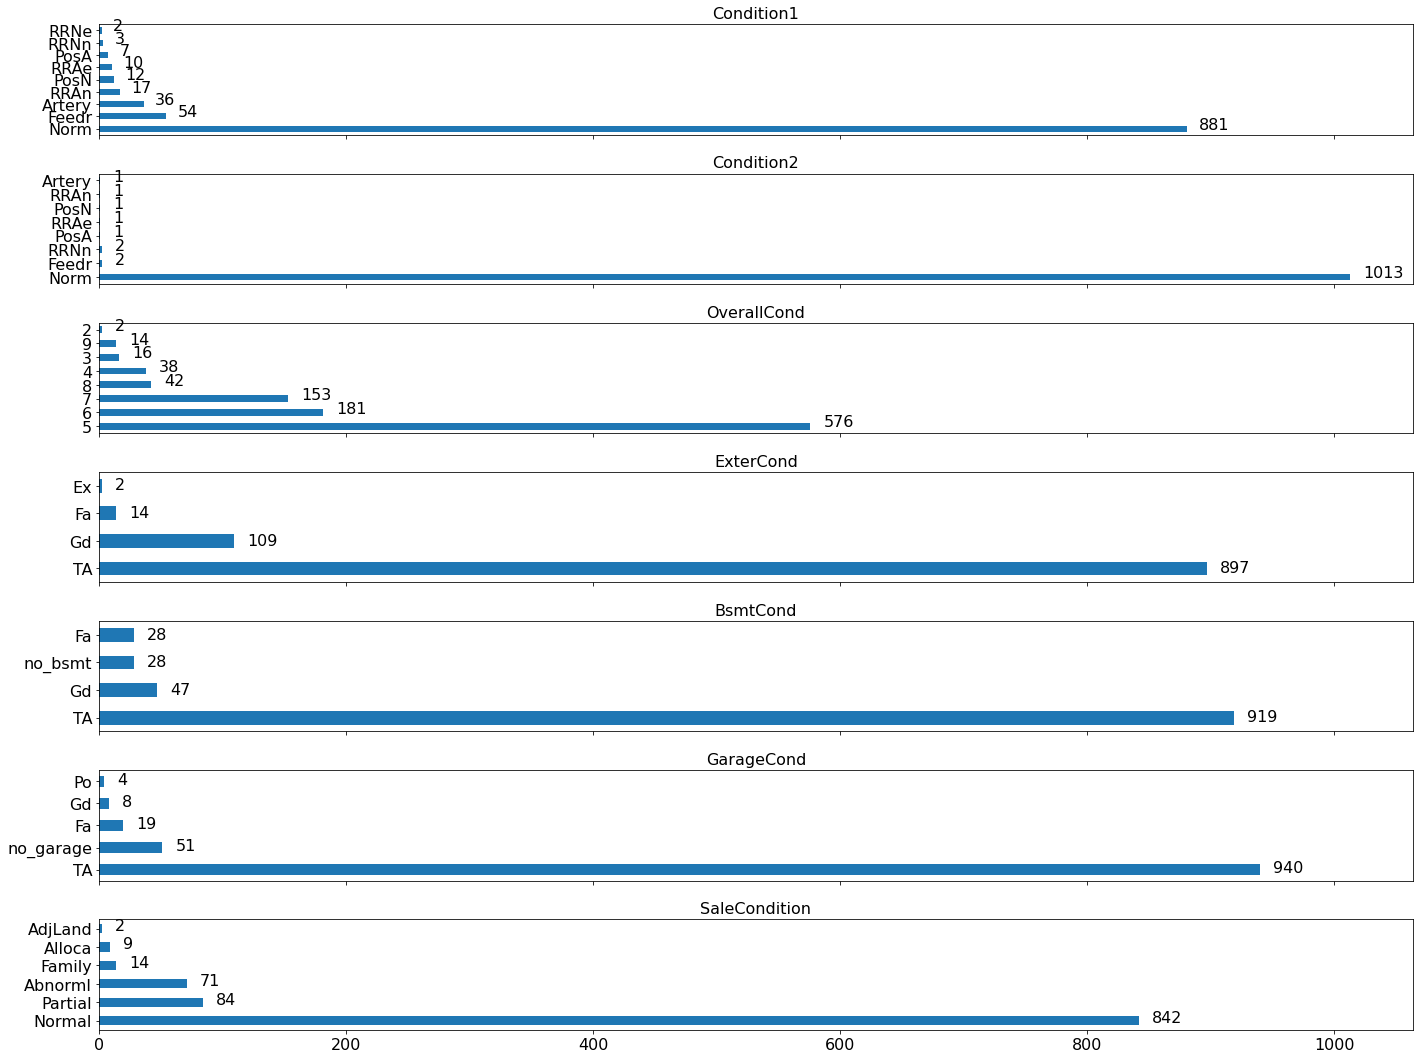

In [191]:
fig,axs = plt.subplots(figsize=(20,15),nrows=len(cond_cols),sharex=True)

for col,ax in zip(cond_cols,axs):
    ax.set_title(col)
    X_train[col].value_counts().plot(kind='barh',ax=ax)
    ax.set_xlabel('')
    add_labels(ax,type_='horizontal')

fig.tight_layout()
plt.show()

In [201]:
cond_cols

Index(['Condition1', 'Condition2', 'OverallCond', 'ExterCond', 'BsmtCond',
       'GarageCond', 'SaleCondition'],
      dtype='object')

In [202]:
colunas_tratadas['Condition1']='onehot'
colunas_tratadas['Condition2']='onehot_with_other'
colunas_tratadas['OverallCond']='onehot'
colunas_tratadas['ExterCond']='onehot'
colunas_tratadas['BsmtCond']='onehot'
colunas_tratadas['GarageCond']='onehot'
colunas_tratadas['SaleCondition']='onehot'

### Area Features

In [210]:
X_train.filter(regex='(?i)area')

,LotArea,MasVnrArea,GrLivArea,GarageArea,PoolArea
435,10667,0.0,1661,550,0
1166,10475,72.0,1694,776,0
935,5825,108.0,747,528,0
588,25095,0.0,1473,452,0
80,13000,576.0,2142,509,0
...,...,...,...,...,...
1389,6000,0.0,1218,440,0
618,11694,452.0,1828,774,0
227,1869,127.0,987,280,0
713,9873,160.0,960,576,0


In [217]:
area_cols = X_train.filter(regex='(?i)area').columns

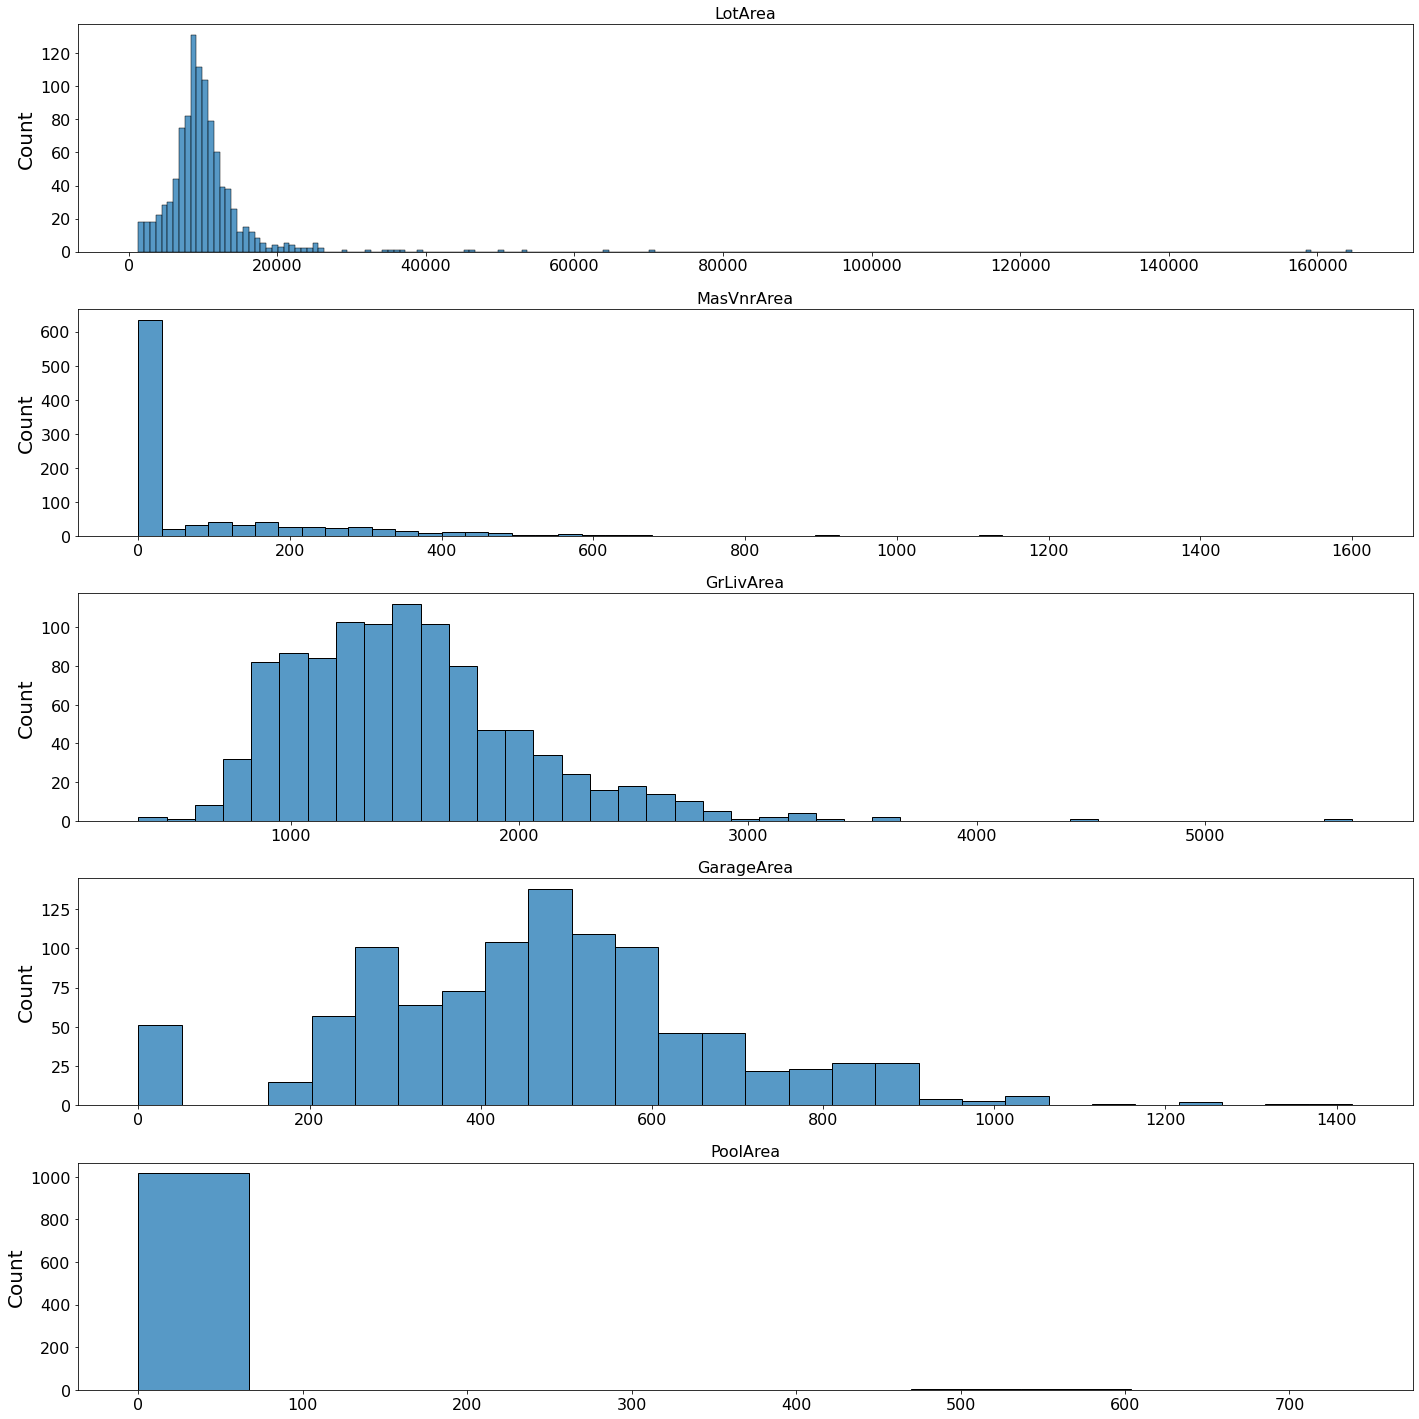

In [221]:
fig,axs = plt.subplots(figsize=(20,20),nrows=len(area_cols))

for col,ax in zip(area_cols,axs):
    ax.set_title(col)
    sns.histplot(X_train[col],ax=ax)
    ax.set_xlabel('')
fig.tight_layout()
plt.show()

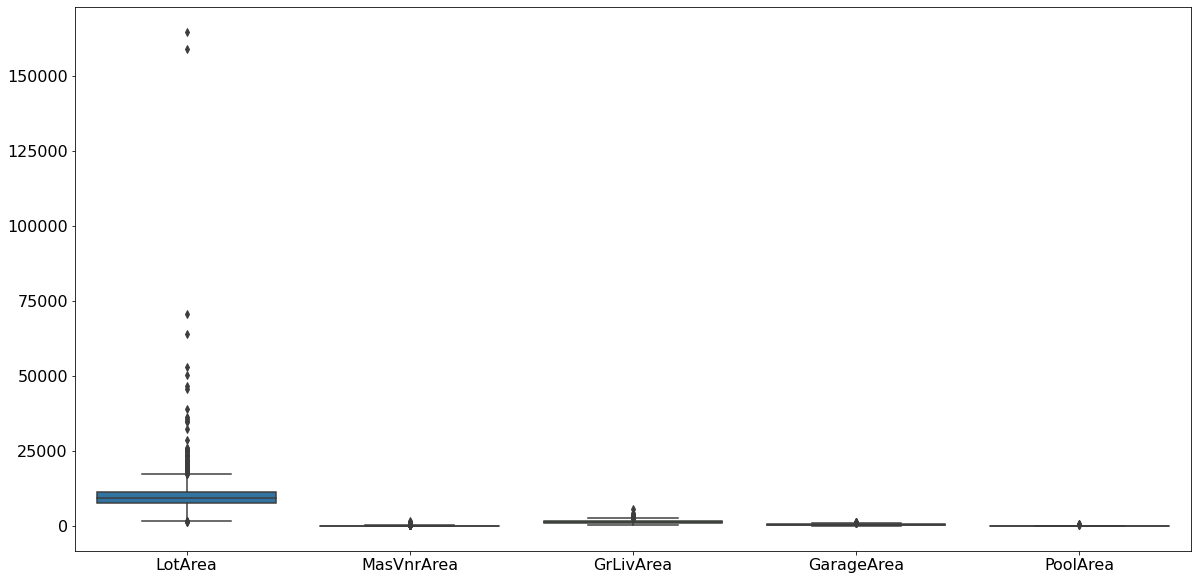

In [219]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=X_train[area_cols],ax=axs)

plt.show()

In [222]:
from sklearn.preprocessing import MinMaxScaler

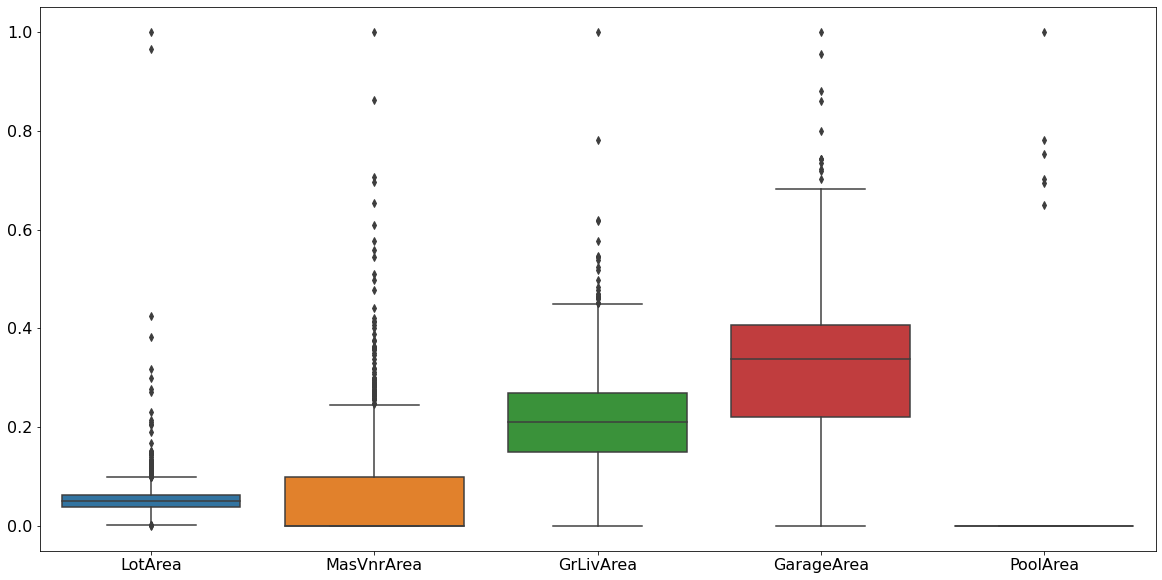

In [225]:
fig,axs = plt.subplots(figsize=(20,10))

sns.boxplot(data=pd.DataFrame(MinMaxScaler().fit_transform(X_train[area_cols]),columns=area_cols),ax=axs)

plt.show()

In [242]:
area_cols

Index(['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea'], dtype='object')

In [243]:
colunas_tratadas['LotArea'] = 'log'
colunas_tratadas['MasVnrArea'] = ''
colunas_tratadas['GrLivArea'] = ''
colunas_tratadas['GarageArea'] = ''
colunas_tratadas['PoolArea'] = ''

##